Customer Segmentation Task 

Import Libraries

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [13]:
# Load Dataset
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [14]:
# Feature Selection [Annual Income & Spending Score]
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Scale The features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Finding the optimal number of clusters (Elbow + silhouette)
sse = []
silhouette = []
K_range = (2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))
    

F:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
F:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


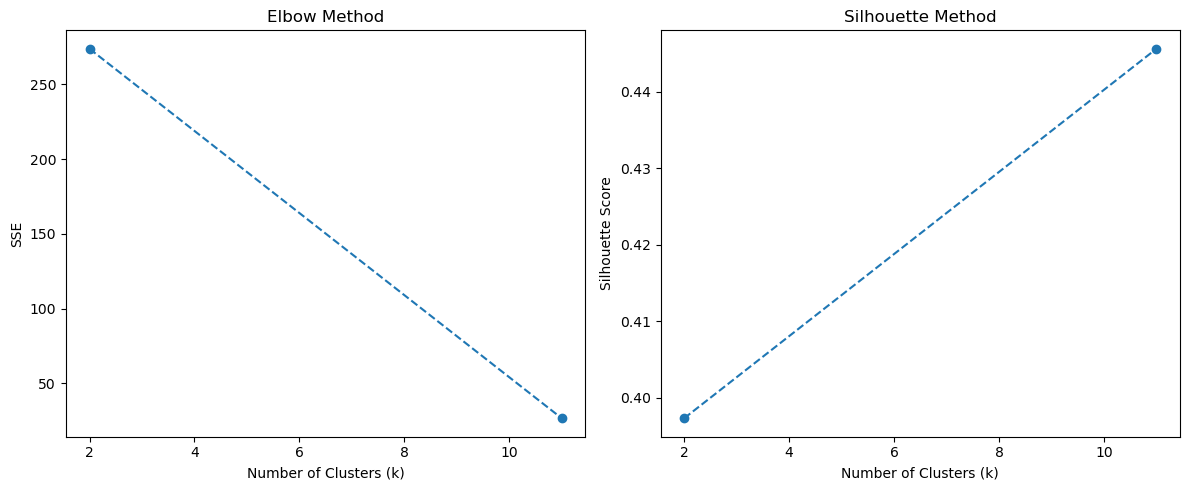

In [19]:
# plotting (Elbow + silhouette)
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, sse, 'o--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette, 'o--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')

plt.tight_layout()
plt.show()



In [20]:
# KMeans with k = 5

k_opt = 5
kmeans = KMeans(n_clusters = k_opt, random_state = 42)
df["Clusters"] = kmeans.fit_predict(X_scaled)

F:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


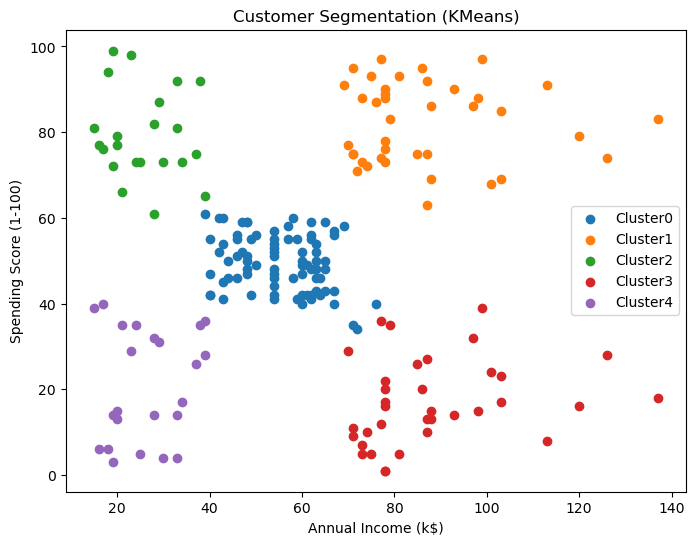

In [22]:
# Visualize Clusters

plt.figure(figsize = (8, 6))
for cluster in range(k_opt):
    cluster_points = df[df["Clusters"] == cluster]
    plt.scatter(cluster_points["Annual Income (k$)"],
                cluster_points["Spending Score (1-100)"],
                label = f"Cluster{cluster}")

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation (KMeans)")
plt.legend()
plt.show()


In [35]:
# Analyzing Cluster Average

summary = df.groupby("Clusters")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()
print("\tCluster Summary (average values)\n")
print(summary)

	Cluster Summary (average values)

          Annual Income (k$)  Spending Score (1-100)
Clusters                                            
0                  55.296296               49.518519
1                  86.538462               82.128205
2                  25.727273               79.363636
3                  88.200000               17.114286
4                  26.304348               20.913043


Bonus Part

In [25]:
# DBSCAN Clustering

from sklearn.cluster import DBSCAN

In [27]:
dbscan =DBSCAN(eps = 0.5, min_samples = 5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [28]:
# DBSCAN Cluster Labels (-1 = noise points)
df["DBSCAN_Cluster"] = dbscan_labels

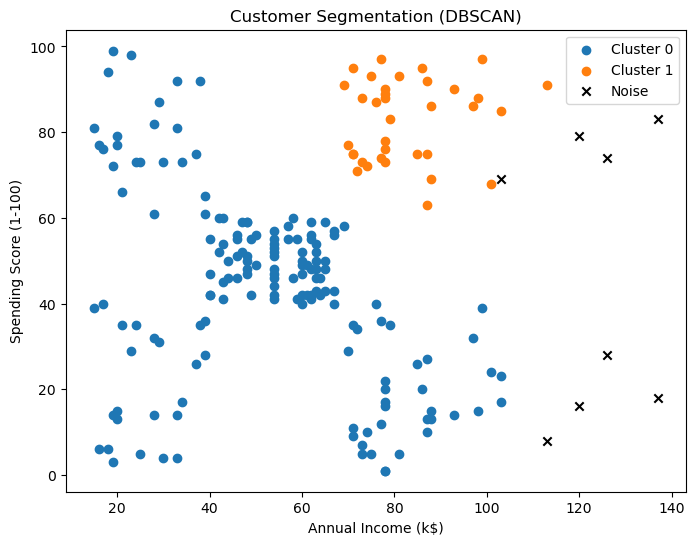

In [29]:
# Visualize DBSACAN resuult

plt.figure(figsize = (8, 6))
unique_clusters = set(dbscan_labels)

for cluster in unique_clusters:
    cluster_points = df[df["DBSCAN_Cluster"] == cluster]
    if cluster == -1:
        # Noise Point in DBSCAN
        plt.scatter(cluster_points["Annual Income (k$)"],
                    cluster_points["Spending Score (1-100)"],
                    label = "Noise", c = "black", marker = "x")

    else:
        plt.scatter(cluster_points["Annual Income (k$)"],
                    cluster_points["Spending Score (1-100)"],
                    label = f"Cluster {cluster}")

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation (DBSCAN)")
plt.legend()
plt.show()

In [36]:
# Analyze DBSCAN clusters (ignoring noise = -1)
summary_dbscan = df[df["DBSCAN_Cluster"] != -1].groupby("DBSCAN_Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()
print("\tDBSCAN Cluster Summary (average values)\n")
print(summary_dbscan)

	DBSCAN Cluster Summary (average values)

                Annual Income (k$)  Spending Score (1-100)
DBSCAN_Cluster                                            
0                        52.490446               43.101911
1                        82.542857               82.800000
